<a href="https://colab.research.google.com/github/clumsycoder42525/Website_analysis/blob/main/Website_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data-export (1).csv')

In [54]:
df.head(5)

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [55]:
df.columns = df.iloc[0]
df = df.drop(index=0).reset_index(drop=True)
df.columns=["channel group","DateHour","Users","Sessions","Engaged Sessions","Average engagement time per session","Engaged sessions per user","Events per session","Engagement rate","Event count"]


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   channel group                        3182 non-null   object
 1   DateHour                             3182 non-null   object
 2   Users                                3182 non-null   object
 3   Sessions                             3182 non-null   object
 4   Engaged Sessions                     3182 non-null   object
 5   Average engagement time per session  3182 non-null   object
 6   Engaged sessions per user            3182 non-null   object
 7   Events per session                   3182 non-null   object
 8   Engagement rate                      3182 non-null   object
 9   Event count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


In [57]:
df[["Users", "Sessions", "Engaged Sessions","Event count"]] = df[["Users", "Sessions", "Engaged Sessions","Event count"]].astype("int64")
df[["Average engagement time per session",	"Engaged sessions per user","Events per session","Engagement rate"]]=df[["Average engagement time per session",	"Engaged sessions per user","Events per session","Engagement rate"]].astype("float64")
df["DateHour"] = pd.to_datetime(df["DateHour"], format="%Y%m%d%H")
df["Hour"]=df["DateHour"].dt.hour


In [58]:
df

,channel group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
...,...,...,...,...,...,...,...,...,...,...,...
3177,Unassigned,2024-04-28 06:00:00,0,1,0,0.000000,0.000000,2.000000,0.000000,2,6
3178,Unassigned,2024-04-30 05:00:00,0,1,0,0.000000,0.000000,2.000000,0.000000,2,5
3179,Unassigned,2024-04-30 06:00:00,0,1,0,0.000000,0.000000,2.000000,0.000000,2,6
3180,Unassigned,2024-05-01 05:00:00,0,1,0,0.000000,0.000000,2.000000,0.000000,2,5


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3182 non-null   object        
 1   DateHour                             3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged Sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  Hour        

In [60]:
df.describe()

,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


#sessions and user over time


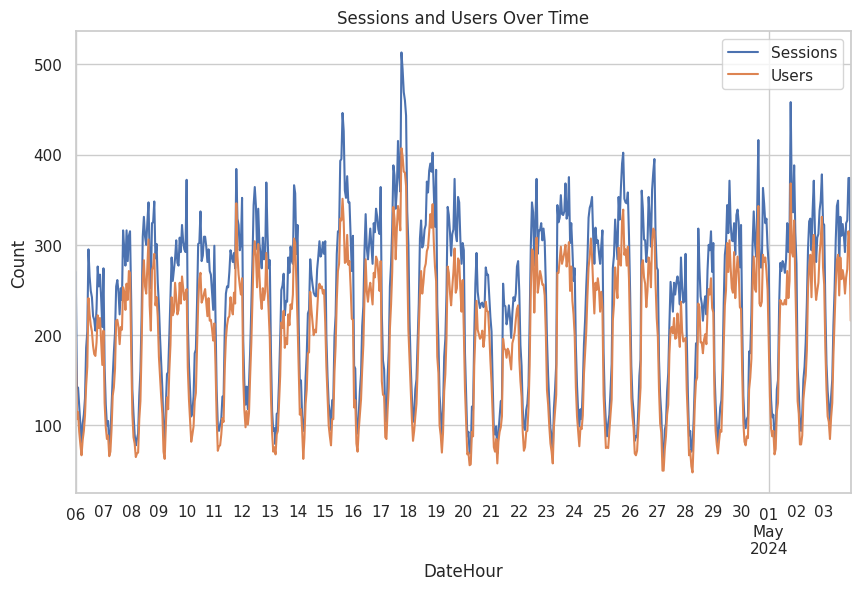

In [61]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
df.groupby("DateHour")[["Sessions","Users"]].sum().plot(ax=plt.gca())
plt.title("Sessions and Users Over Time")
plt.xlabel("DateHour")
plt.ylabel("Count")
plt.legend()
plt.show()

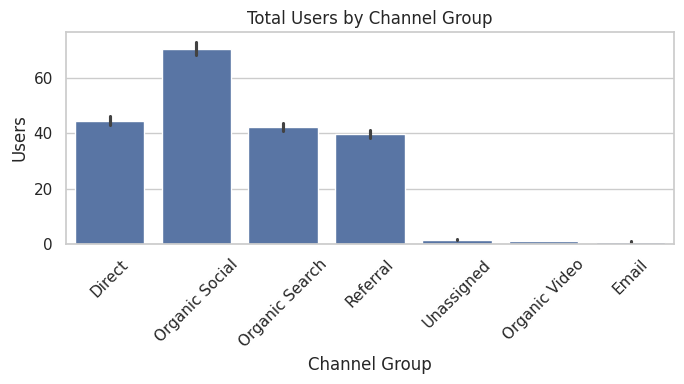

In [66]:
plt.figure(figsize=(7,4))  # <- Pehle figure size define karo
sns.barplot(data=df, x="channel group", y="Users")
plt.title("Total Users by Channel Group")
plt.xlabel("Channel Group")
plt.ylabel("Users")
plt.xticks(rotation=45)  # Optional: agar labels overlap kar rahe ho
plt.tight_layout()
plt.show()


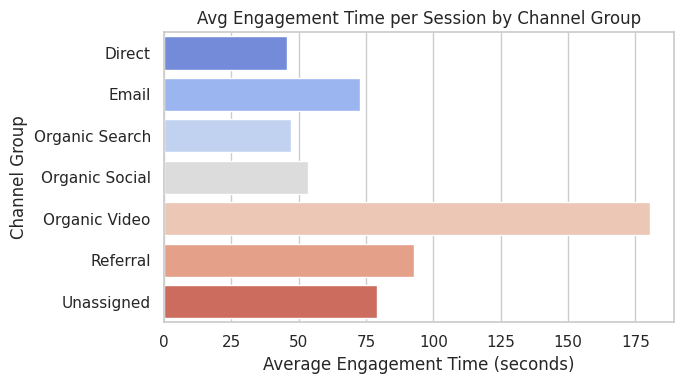

In [78]:
grouped_time = df.groupby("channel group")["Average engagement time per session"].mean().reset_index()
plt.figure(figsize=(7, 4))
sns.barplot(data=grouped_time, y="channel group", x="Average engagement time per session", palette="coolwarm")
plt.title("Avg Engagement Time per Session by Channel Group")
plt.xlabel("Average Engagement Time (seconds)")
plt.ylabel("Channel Group")
plt.tight_layout()
plt.show()


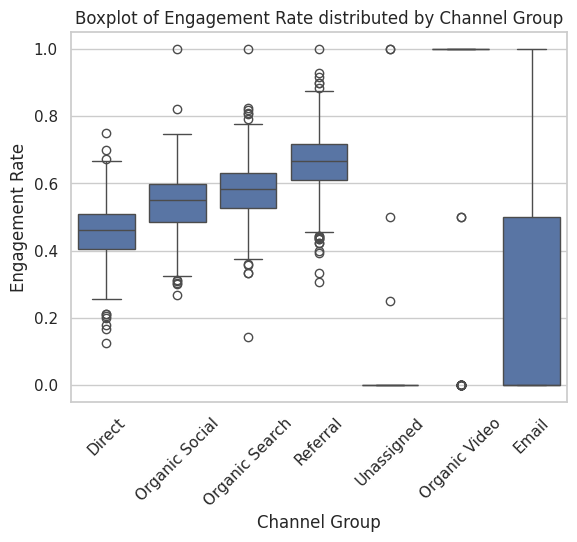

In [80]:
sns.boxplot(data=df, x="channel group", y="Engagement rate")
plt.title("Boxplot of Engagement Rate distributed by Channel Group")
plt.xlabel("Channel Group")
plt.ylabel("Engagement Rate")
plt.xticks(rotation=45 )
plt.show()

In [81]:
df.head(4)

,channel group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18


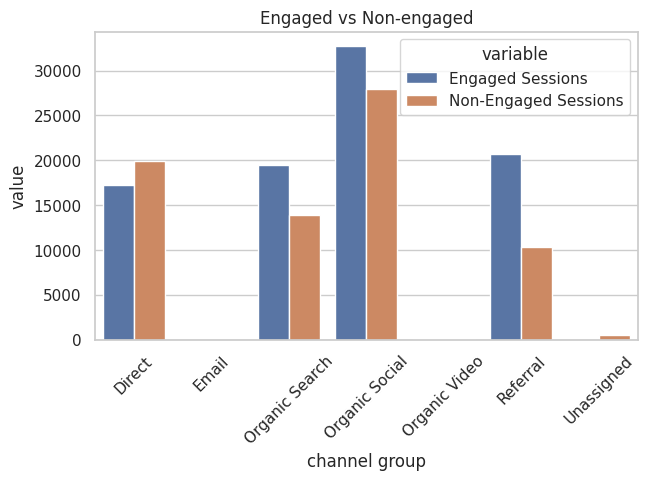

In [83]:
session_df=df.groupby("channel group")[["Sessions","Engaged Sessions"]].sum().reset_index()
session_df["Non-Engaged Sessions"]=session_df["Sessions"]-session_df["Engaged Sessions"]
session_df_new=session_df.melt(id_vars="channel group",value_vars=["Engaged Sessions","Non-Engaged Sessions"])
plt.figure(figsize=(7,4))
sns.barplot(data=session_df_new,x="channel group",y="value",hue="variable")
plt.title("Engaged vs Non-engaged")
plt.xticks(rotation=45)
plt.show()

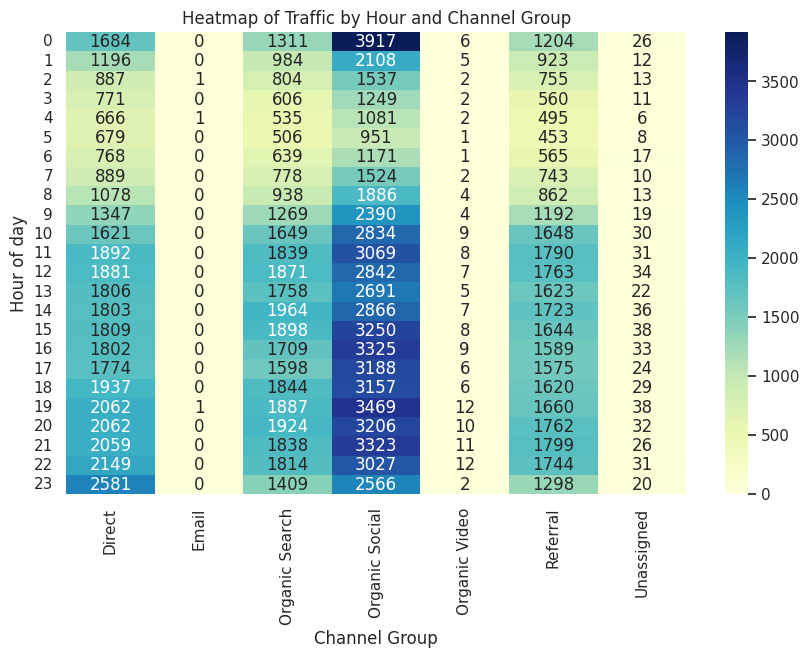

In [84]:
heatmapdata=df.groupby(["Hour","channel group"])["Sessions"].sum().unstack().fillna(0)
plt.figure(figsize=(10,6))
sns.heatmap(heatmapdata,cmap="YlGnBu",annot=True,fmt=".0f")
plt.title("Heatmap of Traffic by Hour and Channel Group")
plt.xlabel("Channel Group")
plt.ylabel("Hour of day")
plt.show()

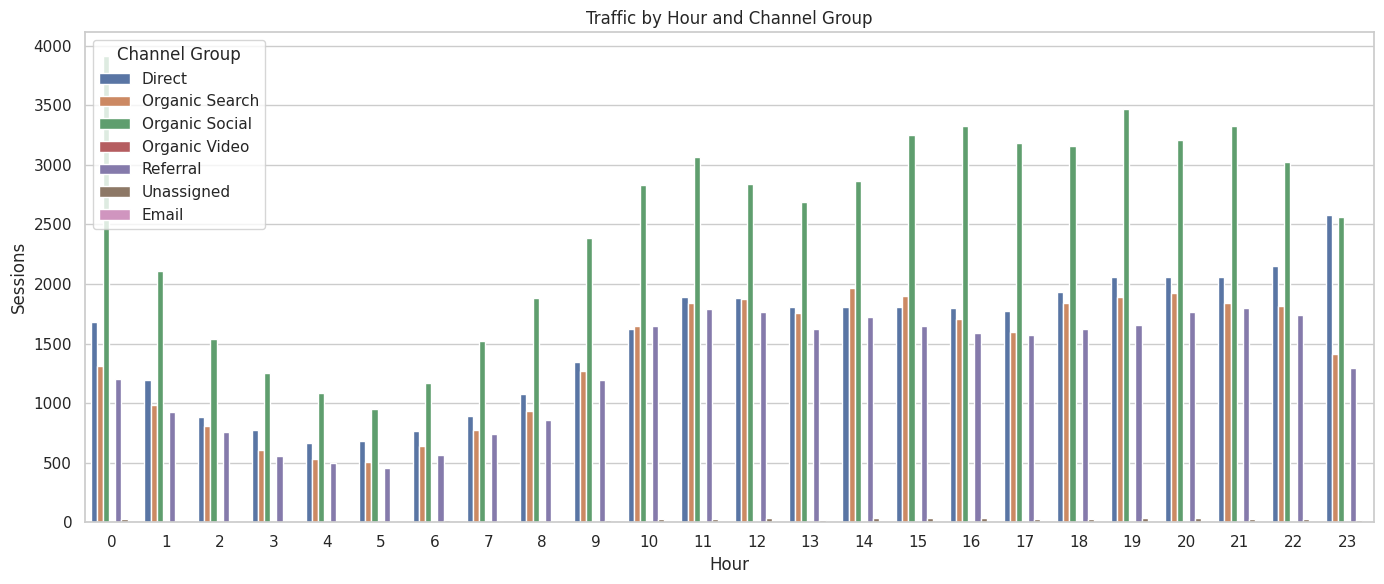

In [85]:
grouped = df.groupby(["Hour", "channel group"])["Sessions"].sum().reset_index()

plt.figure(figsize=(14,6))
sns.barplot(data=grouped, x="Hour", y="Sessions", hue="channel group")
plt.title("Traffic by Hour and Channel Group")
plt.xlabel("Hour")
plt.ylabel("Sessions")
plt.legend(title="Channel Group")
plt.tight_layout()
plt.show()

